# Backpropagation

There are many ways to assign weight to a network. The most popular being backpropagation.

Similar other machine learning algorithm, backpropagation fit a model to a training data.

With a single case of training data inputted into the network, the output is compared to to correct value (target).

If the output of the network is correct then nothing needs to be done, but if it is wrong than backpropagation looks at the difference between the correct value and network output to see how to change the weights so the network would output the correct value.

The difference between network output and target is calculated by an loss function. There are many types of loss functions.

One loss function is the mean square error, which is the mean of square error function.

Square error is for compare a single value with a target, and mean square error for a vector of values.

Square error (SE):

$$E_\text{SE}(\text{target}, \text{output}) = \frac{1}{2} (\text{target} - \text{output})^2$$

Note, the $\frac{1}{2}$ is there so the derivative of square error becomes: $\frac{dE_\text{SE}}{d\text{output}} = \text{output} - \text{target}$

Mean square error (MSE):

$$E_\text{MSE}(\vec{\text{target}}, \vec{\text{output}}) = \frac{1}{2n} \sum_{i=0}^n(\text{target}_i - \text{output}_i)^2$$

The output of the loss function ($E(\cdot)$) is called the loss ($E$).

$$E = E(\vec t, \vec {o_n})$$

Where $\vec t$ is the vector of targets, $\vec {o_n}$ is the vector of network output, and $n$ is the size of these vectors.

Backpropagation alter the weights by performing some form of gradient descent on the loss.

## Gradient descent

Gradient descent is an optimization algorithm. It is for finding the minimum of a function. 

By the way, gradient is just the multi-variable version of derivative.

![gradient_descent.png](img/gradient_descent.png)

In backpropagation, we are finding a set of weights the yields the minimum loss (difference between target and output). 

The idea is to use gradient descent to find the weights that gives the minimum loss.

Since the slope/derivative/gradient always points away from the local minimum, by subtracting the gradient of the loss to the weights, the weights will move toward a lower loss. This is repeatedly done until the minimum is reached.

There will be visualization of how this work in practice next lesson. Just know that gradient descent changes the input variables (e.g., weights) to minimize the output (e.g., loss).

### The gradient descent update rule

$\vec w_{n+1} = \vec w_n - \eta \nabla E $

Where $\vec w_n$ is a vector of all the weights at the $n$ iteration, $\eta$ is a learning rate, $E$ is the loss. $\nabla E$ means the gradient of loss.
 
Usually the learning rate $\eta$ is positive and set far below 1.

Or the change in $\vec w$ equals negative learning rate times gradient of loss:

$\Delta \vec w = - \eta \nabla E$

Backpropagation is just repeatedly applying some form of gradient descent update rule to each weight. The most popular update rule right now is the [Adam optimizer](https://arxiv.org/abs/1412.6980).

### Stochastic gradient descent
Generally, batch gradient descent or stochastic gradient descent is used. The difference with gradient descent is how much data is used to calculate the loss.

- gradient descent: The loss of all the training data is added up.

- stochastic gradient descent: Only use a single case of training data.

- batch gradient descent: The loss of a handful of training data is added up.

The original backpropagation uses stochastic gradient descent, so that is the one we will be using for now.

We will be considering the loss of a single case of training data at each iteration.

### Breaking down the update rule

The gradient is a vector consisting of all the partial derivative with respect to the weights:

$$\nabla E = (\frac{\partial E}{\partial w_{ij}}, \dots)$$ $$ i, j \in N $$

Where $E$ is the loss, $w_{ij}$ is the weight between neuron $i$ and $j$, and $N$ denotes the set of all the neurons in the network.

Note $\partial$ is the partial derivative symbol. Partial derivative calculated just like derivatives. The difference is just the multi-variable setting.

The update rule describes how to change all the weight:

$$\Delta \vec w = - \eta \nabla E$$

For a single weight, this formula becomes:

$$\Delta w_{ij} = - \eta \frac{\partial E}{\partial w_{ij}}$$

So in backpropagation we need to calculate a bunch of partial derivative to update the weights.

## Calculating partial derivatives

This section is going to be very long. Calculating the partial derivatives is not difficult at all, it only requires the basics learned in a calculus class. But due to the complex structure of the neuron network, there is a lot stuff to keep track of. This section might require several rereading to fully comprehend.

In order to calculate a partial derivative of the loss with respect to a weight, we need to apply the chain rule for derivative.

$$\frac{\partial E}{\partial w_{ij}} = \frac{\partial E}{\partial o_j} \cdot \frac{\partial o_j}{\partial w_{ij}} $$

Where $w_{ij}$ is the weight of $i$ input of $j$ neuron, $o_j$ is the output of $j$ neuron.

What this formula is saying is that the partial derivative of the loss with respect to a weight ($\frac{\partial E}{\partial w_{ij}}$) can be split into: partial derivative of the loss with respect to the neuron output ($\frac{\partial E}{\partial o_j}$) and partial derivative of the neuron output with respect to the weight ($\frac{\partial o_j}{\partial w_{ij}}$).

![backpropagation_chain_rule.png](img/backpropagation_chain_rule.png)

### The $\frac{\partial o_j}{\partial w_{ij}}$ part

Recall the neuron function: $n(\vec x) = h(\vec w \cdot \vec x)$

So the output of neuron $j$ ($o_j$) is equal to:

$o_j = h_j(\vec w \cdot \vec x)$

Where $h_j(\cdot)$ is the activation function of neuron $j$.

Or breaking it down to two parts, the weighted sum ($s_j$) and the activation function of neuron $j$ ($h_j(\cdot)$):

$s_j = \vec w \cdot \vec x$ 

$o_j = h_j(s_j)$

Using the chain rule:

$$ \frac{\partial o_j}{\partial w_{ij}} = \frac{\partial o_j}{\partial s_j} \cdot \frac{\partial s_j}{\partial w_{ij}}$$

The partial derivative of first term is:

$$\frac{\partial o_j}{\partial s_j} = \frac{\partial}{\partial s_j} h_j(s_j) = \frac{\partial h_j(s_j)}{\partial s_j}$$

Which is the derivative of the activation function with respect to the weighted sum.

If sigmoid is the activation function.

$$h(x) = \sigma(x) = \frac{1}{1+e^{\text{-}x}}$$

Then the derivative would be:

$$ \frac{\partial h_j(s_j)}{\partial s_j} = \sigma^\prime(s_j) = \frac{e^{\text{-}s_j}}{(1+e^{\text{-}s_j})^2}$$

For the second term $\frac{\partial s_j}{\partial w_{ij}}$:

Recall the weighted sum function: 

$s_j = \vec w \cdot \vec x$ where $\vec x$ is a vector of the inputs and $\vec w$ is the weights associated with them.

$$s_j = \sum_{i \in I} w_{ij} \cdot x_i$$

where $I$ is the set of all inputs connect to neuron $j$, and $w_{ij}$ is the weight associated with the connection from input $i$ to neuron $j$. 

Or in the case where the input is the output of the neuron that comes before it.

$$s_j = \sum_{l \in L} w_{lj} \cdot o_l$$

Where $L$ is the set of all the neurons whose output is the input for neuron $j$, the weight $w_{lj}$ is associated with the connection from neuron $l$ to neuron $j$, and $o_l$ is the output of neuron $l$ which is also the input of neuron $j$.

For a fully connected network, the set $L$ is the layer of neurons before neuron $j$.

$$\frac{\partial s_j}{\partial w_{ij}} = \frac{\partial}{\partial w_i} (\vec w \cdot \vec x) = \frac{\partial}{\partial w_{ij}} \sum_{l \in L} w_{lj} \cdot o_l = \frac{\partial}{\partial w_{ij}} (w_{ij} \cdot o_i) = o_i$$

So this term is just the input of neuron $j$ associated with weight $w_{ij}$, aka output of neuron $i$ ($o_i$). 

In the case, which neuron $j$ is in the next layer after input layer, then: 

$$o_i = x_i$$

Since the output of input layer is the input of the network ($\vec x = (x_1, \dots , x_n)$).

Putting it together:

$$ \frac{\partial o_j}{\partial w_{ij}} = \frac{\partial h_j(s_j)}{\partial s_j} \cdot o_i$$

Which is the derivative of the activation function $h(\cdot)$ with respect to the weighted sum ($s_j$) multiplied by the output of neuron 𝑖.

### The $\frac{\partial E}{\partial o_j}$ part

If neuron $j$ is in the output layer then it would be simple, $\frac{\partial E}{\partial o_j}$ is the derivative of the loss function with respect to one of the output.

If the error function is mean square error (MSE):

$$E = E_\text{MSE}(\vec{\text{target}}, \vec{\text{output}}) = \frac{1}{2n} \sum_{i=0}^n(\text{target}_i - \text{output}_i)^2$$

Where $\vec t$ is the vector containing the outputs, $\vec {o_n}$ is the vector containing network output, and n is the size of these vectors.

Then the partial derivative will be:

$$\frac{\partial E}{\partial o_j} = \frac{\partial E_\text{MSE}(\vec t, \vec {o_n})}{\partial o_j} = \frac{\partial}{\partial o_j} \biggl( \frac{1}{2n} \sum_{i=0}^n(\text{target}_i - \text{output}_i)^2 \biggr)$$

Since neuron $j$ is in output layer, its output $o_j$ is in the vector $\vec {o_n}$.

$$ \frac{\partial}{\partial o_j} \biggl( \frac{1}{2n} \sum_{i=0}^n(\text{target}_i - \text{output}_i)^2 \biggr) = \frac{\partial}{\partial o_j} \frac{1}{2n}\cdot (t_j - o_j)^2 = \frac{1}{n} \cdot (o_j - t_j)$$


The general form for $\frac{\partial E}{\partial o_j}$ is:

$$\frac{\partial E}{\partial o_j} = \frac{\partial E(t_j, o_j)}{\partial o_j}$$

Where $o_j$ is the output of neuron $j$, and $t_j$ is the target value for neuron $j$.

However, if neuron $j$ is not in the output layer then $\frac{\partial E}{\partial o_j}$ needs to be broken down with the chain rule.

$$ \frac{\partial E}{\partial o_j} = \sum_{l \in L} \frac{\partial E}{\partial s_l} \cdot \frac{\partial s_l}{\partial o_j}$$

Where $L$ denotes the set that contains all neurons which takes the output of neuron $j$ ($o_j$) as input.

For fully connected network, the set $L$ is consist of the next layer after neuron $j$.

$s_l$ are the weighted sum component of these neurons.  

$$\sum_{l \in L} \frac{\partial E}{\partial s_l} \cdot \frac{\partial s_l}{\partial o_j} = \sum_{l \in L} \frac{\partial E}{\partial o_l} \cdot \frac{\partial o_l}{\partial s_l} \cdot \frac{\partial s_l}{\partial o_j}$$

Let us break down what each term means

The last term $\frac{\partial s_l}{\partial o_j}$ is quite simple.

Recall the weighted sum function: 

$s_l = \vec w \cdot \vec x$ where $\vec x$ is a vector of the inputs and $\vec w$ is the weights associated with them.

In this case the input is the output of the neuron that comes before it.

$$s_l = \sum_{i \in I} w_{il} \cdot o_i$$

Where $I$ is the set of neuron that which neuron $l$ takes as input. 

By the way, the neuron $j$ is in set $I$. Or in mathematics expression: $I = \{j,  \dots\}$.

Taking the partial derivative of $s_l$ with respect to $o_j$ will be:

$$\frac{\partial s_l}{\partial o_j} = \frac{\partial}{\partial o_j} \sum_{i \in I} w_{il} \cdot o_i = \frac{\partial}{\partial o_j} w_{jl} \cdot o_j = w_{jl} $$

This is just the weight between neuron $j$ and neuron $l$.

We have already seen the $\frac{\partial o_l}{\partial s_l}$. 

It is just the derivative of the activation function. Recall we have concluded that: 

$$\frac{\partial o_j}{\partial s_j} = \frac{\partial h_j(s_j)}{\partial s_j}$$

Same here:

$$\frac{\partial o_l}{\partial s_l} = \frac{\partial h_l(s_l)}{\partial s_l}$$

We also have seen the $\frac{\partial E}{\partial o_l}$ term. Recall at the start of this section:

$$ \frac{\partial E}{\partial o_j} = \sum_{l \in L} \frac{\partial E}{\partial o_l} \cdot \frac{\partial o_l}{\partial s_l} \cdot \frac{\partial s_l}{\partial o_j}$$

Note the $\frac{\partial E}{\partial o_j}$ and $\frac{\partial E}{\partial o_l}$ just differ on which neuron the output is from.

We can substitute $o_j$ for $o_l$ recursively in this formula.

Therefore, the $\frac{\partial E}{\partial o_l}$ term can be defined recursively.

##### Example:

Say neuron $j$ is in the second last layer, we can expend out the recursion to:

$$ \frac{\partial E}{\partial o_j} = \sum_{l_{n-1} \in L_{n-1}} \Bigl( \sum_{l_{n} \in L_n} \frac{\partial E}{\partial o_{l_n}} \cdot \frac{\partial o_{l_n}}{\partial s_{l_n}} \cdot \frac{\partial s_{l_n}}{\partial o_j} \Bigr) \cdot \frac{\partial o_{l_{n-1}}}{\partial s_{l_{n-1}}} \cdot \frac{\partial s_{l_{n-1}}}{\partial o_j}$$

if we substitute the out the term we define in this section then:

$$\frac{\partial E}{\partial o_j} = \sum_{l_{n-1} \in L_{n-1}} \Bigl( \sum_{l_{n} \in L_n} \frac{\partial E}{\partial o_{l_n}} \cdot \frac{\partial h_{l_n}(s_{l_n})}{\partial s_{l_n}} \cdot w_{jl_n} \Bigr) \cdot \frac{\partial h_{l_{n-1}}(s_{l_{n-1}})}{\partial s_{l_{n-1}}} \cdot w_{jl_{n-1}}$$

Where $L_n$ is the set of neurons in the last layer, and $L_{n-1}$ is the set of neurons in the second last layer.

As it mention at the start of this section, if neuron $j$ in $\frac{\partial E}{\partial o_j}$ is the output layer then $\frac{\partial E}{\partial o_j}$ is the partial derivative of the error function ($\frac{\partial E(t_j, o_j)}{\partial o_j}$).

$$\frac{\partial E}{\partial o_{l_n}} = \frac{\partial E(t_j, o_j)}{\partial o_j} \quad \text{if neuron $j$ is an output neuron}$$ 

Summing it up:

$$ \frac{\partial E}{\partial o_j} = \begin{cases} \frac{\partial E(t_j, o_j)}{\partial o_j} & \text{if $j$ is an output neuron} \\ \sum_{l \in L} \frac{\partial E}{\partial o_l} \cdot \frac{\partial h_l(s_l)}{\partial s_l} \cdot w_{jl} & \text{otherwise}\end{cases}$$

### Putting it together

Now each term of the of the partial derivative is defined we can put it together. 

$$\frac{\partial E}{\partial w_{ij}} = \frac{\partial E}{\partial o_j} \cdot \frac{\partial o_j}{\partial w_{ij}}$$

In "the $\frac{\partial o_j}{\partial w_{ij}}$ part", we learn to expand out $\frac{\partial o_j}{\partial w_{ij}}$:

$$\frac{\partial E}{\partial o_j} \cdot \frac{\partial o_j}{\partial w_{ij}} = \frac{\partial E}{\partial o_j} \cdot \frac{\partial o_j}{\partial s_j} \cdot \frac{\partial s_j}{\partial w_i}$$

We also learned that $\frac{\partial s_j}{\partial w_i} = o_i$. Therefore:

$$\frac{\partial E}{\partial o_j} \cdot \frac{\partial o_j}{\partial s_j} \cdot \frac{\partial s_j}{\partial w_i} = \frac{\partial E}{\partial o_j} \cdot \frac{\partial o_j}{\partial s_j} \cdot o_i$$

The $\frac{\partial o_j}{\partial s_j}$ is the partial derivative of the activation function. So:

$$\frac{\partial E}{\partial o_j} \cdot \frac{\partial o_j}{\partial s_j} \cdot o_i = \frac{\partial E}{\partial o_j} \cdot \frac{\partial h_j(s_j)}{\partial s_j} \cdot o_i$$

Finally we learned the recursive definition of $\frac{\partial E}{\partial o_j}$:

$$ \frac{\partial E}{\partial o_j} = \begin{cases} \frac{\partial E(t_j, o_j)}{\partial o_j} & \text{if $j$ is an output neuron} \\ \sum_{l \in L} \frac{\partial E}{\partial o_l} \cdot \frac{\partial h_l(s_l)}{\partial s_l} \cdot w_{jl} & \text{otherwise}\end{cases}$$

Together with:

$$\frac{\partial E}{\partial w_{ij}} = \frac{\partial E}{\partial o_j} \cdot \frac{\partial h_j(s_j)}{\partial s_j} \cdot o_i$$

The is complete formula for partial derivative of loss with respect to any weight in the network.

### Using the shorthand $\delta$:

However, it is more common to rewrite it as with a shorthand variable $\delta$:

$$\delta_j = \frac{\partial E}{\partial o_j} \cdot \frac{\partial o_j}{\partial s_j} = \frac{\partial E}{\partial o_j} \cdot \frac{\partial h_j(s_j)}{\partial s_j}$$

Expanding out the $\frac{\partial E}{\partial o_j}$ gives:

$$ \delta_j = \frac{\partial E}{\partial o_j} \cdot \frac{\partial h_j(s_j)}{\partial s_j} = \begin{cases} \frac{\partial E(t_j, o_j)}{\partial o_j} \cdot \frac{\partial h_j(s_j)}{\partial s_j} & \text{if $j$ is an output neuron} \\ \Bigl( \sum_{l \in L} \frac{\partial E}{\partial o_l} \cdot \frac{\partial h_l(s_l)}{\partial s_l} \cdot w_{jl} \Bigr) \cdot \frac{\partial h_j(s_j)}{\partial s_j} & \text{otherwise}\end{cases}$$

By substitute of $\delta_l = \frac{\partial E}{\partial o_l} \cdot \frac{\partial h_l(s_l)}{\partial s_l}$, gives:

$$\delta_j = \begin{cases} \frac{\partial E(t_j, o_j)}{\partial o_j} \cdot \frac{\partial h_j(s_j)}{\partial s_j} & \text{if $j$ is an output neuron} \\ \bigl( \sum_{l \in L} \delta_l \cdot w_{jl} \bigr) \cdot \frac{\partial h_j(s_j)}{\partial s_j} & \text{otherwise}\end{cases}$$

Now the formula can be rewritten with $\delta$:

$$\frac{\partial E}{\partial w_{ij}} = \frac{\partial E}{\partial o_j} \cdot \frac{\partial h_j(s_j)}{\partial s_j} \cdot o_i = \delta_j \cdot o_i$$

## The backpropagation partial derivative formula
\begin{align}
& \frac{\partial E}{\partial w_{ij}} = \delta_j \cdot o_i \\
& \delta_j = \begin{cases} \frac{\partial E(t_j, o_j)}{\partial o_j} \cdot \frac{\partial h_j(s_j)}{\partial s_j} & \text{if $j$ is an output neuron} \\ \bigl( \sum_{l \in L} \delta_l \cdot w_{jl} \bigr) \cdot \frac{\partial h_j(s_j)}{\partial s_j} & \text{otherwise}\end{cases}
\end{align}

Where:

$o_i$ is the output of neuron $i$

$E(\cdot)$ is the loss function

$o_j$ is the output of neuron $j$

$t_j$ is the target for output neuron $j$

$h_j(\cdot)$ is the activation function of neuron $j$

$s_j$ is the weight sum part of neuron $j$

$L$ is the set of neurons that is connected to the output of neuron $j$

$w_{jl}$ is the weight of the connection from neuron $j$ to neuron $l$

### Example:

To give a feel of what the backpropagation partial derivative formula looks like when expended out, we will use an example.

A small network with 1 hidden layer and 2 neurons in all the layers:

![labeled_neural_network.png](img/labeled_neural_network.png)

Let us start with the partial derivative of $w_{h2o2}$:

$$\frac{\partial E}{\partial w_{h2o2}} = \delta_{o2} \cdot o_{h2}$$

with $\delta_{o2}$ being:

$$\delta_{o2} = \frac{\partial E(t_{o2}, o_{o2})}{\partial o_{o2}} \cdot \frac{\partial h_{o2}(s_{o2})}{\partial s_{o2}}$$

Together:

$$\frac{\partial E}{\partial w_{h2o2}} = \frac{\partial E(t_{o2}, o_{o2})}{\partial o_{o2}} \cdot \frac{\partial h_{o2}(s_{o2})}{\partial s_{o2}} \cdot o_{h2}$$

Each of the term:

$\frac{\partial E(t_{o2}, o_{o2})}{\partial o_{o2}}$ = partial derivative loss function with respect to output of neuron $o2$.

$\frac{\partial h_{o2}(s_{o2})}{\partial s_{o2}}$ = derivative of activation function of neuron $o2$.

$o_{h2}$ = output of the neuron $h2$. Which is the input corresponding to the weight $w_{h2o2}$.

One thing to note here is that we would need the output of neurons $o2$ and $h2$ to calculate $\frac{\partial E}{\partial w_{h2o2}}$. To calculate $\frac{\partial E}{\partial w_{h1o1}}$, we will need output of neuron $h1$ and $01$, etc.

So it would be time saving if we just save the input/output of all the neurons. Rather than recalculating it every time we need it.

For $w_{i2h2}$ the partial derivative would be more complicated:

$$\frac{\partial E}{\partial w_{i2h2}} = \delta_{h2} \cdot o_{i2}$$

with $\delta_{h2}$ being:

$$\delta_{h2} = \bigl( \sum_{l \in L} \delta_l \cdot w_{h2l} \bigr) \cdot \frac{\partial h_{h2}(s_{h2})}{\partial s_{h2}}$$

The set $L$ contains all the neurons connected to the output of neuron $h2$, therefore: $L=\{o1, o2 \}$

Expanding it out:

$$\delta_{h2} = \bigl( \delta_{o1} \cdot w_{h2o1} +  \delta_{o2} \cdot w_{h2o2} \bigr) \cdot \frac{\partial h_{h2}(s_{h2})}{\partial s_{h2}}$$

Note that we need $\delta_{o1}$ and $\delta_{o2}$, which is also used to calculate partial derivative of weights for neuron $o1$ and $o2$.

In other words, we could calculate the partial derivative of neuron $o1$ and $o2$ first, saving the value of $\delta_{o1}$ and $\delta_{o2}$ then used it when calculating neuron $h1$ and $h2$.

Calculating the partial derivatives from the output layer first then moving toward the input layer is what give backpropagation its name. Since we are moving backwards from the output layer first toward the input layer.

Continuing on, if we expand out the $\delta$ then the formula becomes:


$$\delta_{h2} = \Biggl( \frac{\partial E(t_{o1}, o_{o1})}{\partial o_{o1}} \cdot \frac{\partial h_{o1}(s_{o1})}{\partial s_{o1}} \cdot w_{h2o1} +  \frac{\partial E(t_{o2}, o_{o2})}{\partial o_{o2}} \cdot \frac{\partial h_{o2}(s_{o2})}{\partial s_{o2}} \cdot w_{h2o2} \Biggr) \cdot \frac{\partial h_{h2}(s_{h2})}{\partial s_{h2}}$$

And the whole thing becomes:
\begin{align}
\frac{\partial E}{\partial w_{i2h2}} & = \Biggl( \frac{\partial E(t_{o1}, o_{o1})}{\partial o_{o1}} \cdot \frac{\partial h_{o1}(s_{o1})}{\partial s_{o1}} \cdot w_{h2o1} +  \frac{\partial E(t_{o2}, o_{o2})}{\partial o_{o2}} \cdot \frac{\partial h_{o2}(s_{o2})}{\partial s_{o2}} \cdot w_{h2o2} \Biggr) \cdot \frac{\partial h_{h2}(s_{h2})}{\partial s_{h2}} \cdot o_{i2} \\
& = \frac{\partial E(t_{o1}, o_{o1})}{\partial o_{o1}} \cdot \frac{\partial h_{o1}(s_{o1})}{\partial s_{o1}} \cdot w_{h2o1} \cdot \frac{\partial h_{h2}(s_{h2})}{\partial s_{h2}} \cdot o_{i2} +  \frac{\partial E(t_{o2}, o_{o2})}{\partial o_{o2}} \cdot \frac{\partial h_{o2}(s_{o2})}{\partial s_{o2}} \cdot w_{h2o2} \cdot \frac{\partial h_{h2}(s_{h2})}{\partial s_{h2}} \cdot o_{i2} 
\end{align}

There are two large terms in the formula separated by a $+$ sign.

Note each of the large term contains two derivatives for activation functions. 

This is because the neuron $h2$ is at the second last layer. The partial derivative for weights of neurons $n$ layers away from output layer would have $n + 1$ derivatives of activation function in each term in a fully connected network.

This is important to remember when we learn about the vanishing gradient problem and exploding gradient problem next lesson. 

### Recap:

How Backpropagation works:

With a single case of training data calculate the network output.

Calculate the difference of network output and target with loss function.

Calculate the partial derivatives of the loss with respect to all the weights.

Update each weight according to the update rule:

$$\Delta w_{ij} = - \eta \frac{\partial E}{\partial w_{ij}}$$

Repeat.

## Backpropagation algorithm

Backpropagation gradient calculation is consist of two phases: the forward pass, and the backward pass.

During the forward pass, the input/output of the neurons are saved in a cache. It will be used when calculating the gradients during the backward pass.

During the backward pass, the partial derivatives of each weight are calculated starting from neurons in the output layer and working backwards. While computing the partial derivatives, the $\delta$ are saved. 

Full algorithm:

With a neural network, a loss function, an input vector, and a target vector:

1. Compute the network output from the neural network and input vector. Store the output of each neuron in a cache.

2. Calculate the partial derivatives of loss with respect to each weight connected to the output neurons, using variables in the cache. Store the $\delta$ of output neurons in the cache.

3. Calculate the partial derivatives of loss with respect to each weight connected to the neurons of the next layer closer to input layer, using variables in the cache. Store the $\delta$ of these neurons in the cache.

4. Repeat step 3 until all partial derivatives are calculated.

5. Use the update rule to update all the weights.

## Implementation

We will use the same dataset as the last lesson.

Dataset: Iris flower classification dataset

### Load the dataset

In [1]:
import os

import numpy as np
import pandas as pd

In [2]:
data_path = os.path.join('data', 'iris.data')
dataset = pd.read_csv(data_path, names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class'])

Here is what some of the data look like:

In [3]:
dataset[99:101]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
99,5.7,2.8,4.1,1.3,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


The "class" column is the type of flower.

The other four column are the length and width of sepal and petal, these are the four features given in the dataset.

Out of the 4 features given we are only going to use the petal length and petal width.

And we will only be classifying two type of flowers (Iris-setosa and Iris-versicolor).

The goal of our network is to determine which class a data point belongs to.

Given set of petal length and petal width, the network would output the class of the flower.

So our training data should be input and target pairs:

In [4]:
training = {}
training['input'] = dataset.loc[:99, ['petal length (cm)', 'petal width (cm)']].to_numpy(dtype=np.float_)

A input vector would look like:

In [5]:
training['input'][50]

array([4.7, 1.4])

Now we need to convert the class to an array.

Each element of array represents a type of flower. The element corresponding to the correct class would be 1, and other will have a value of 0.

For example, "Iris-setosa" be may represented with $(1, 0, 0)$.

However, we are only using two classes so it would be $(1, 0)$.

This type of representation is called one-hot vector.

In [6]:
to_class = {0: "Iris-setosa", 1: "Iris-versicolor"}
to_index = {"Iris-setosa": 0, "Iris-versicolor": 1}

def to_one_hot(num_class, indexes):
    """Outputs a matrix of one hot vectors."""
    # Create vectors of zeros.
    n = len(indexes)
    one_hot = np.zeros((n, num_class), dtype=np.float_)
    # Set correct class to 1.
    one_hot[np.arange(n), indexes] = 1
    return one_hot

In [7]:
training['target'] = to_one_hot(2, [to_index[t] for t in dataset.loc[:99, 'class']])

A target vector would look like:

In [8]:
training['target'][50]

array([0., 1.])

What we are hoping is the network would learn a decision boundary like the following:

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

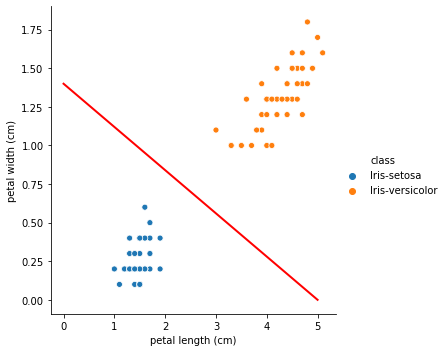

In [10]:
sns.relplot(x='petal length (cm)', y='petal width (cm)', hue='class', data=dataset.loc[:99])
plt.plot([5, 0], [0, 1.4], 'r', linewidth=2)
plt.show()

It is best to shuffle the data before training.

In [11]:
from sklearn.utils import shuffle

In [12]:
training['input'], training['target'] = shuffle(training['input'], training['target'])

### Implementing the network

We will be implementing a fully connected feed forward network.

Unlike the formula above, the implementation will be processing a layer at once.

E.g,. calculating neurons output of a layer at once in matrix dot product, calculating loss and partial derivatives of loss at once using vectors operations, etc.

In other words, to increase performance the implementation will take a vector of inputs, process them in vector form and outputs vectors of results.

This is done with numpy arrays.

In [13]:
import numpy as np

Let us start with implementing an activation function and loss function:

Implementation of sigmoid activation function, and its derivative.

$$\sigma(x) = \frac{1}{1+e^{\text{-}x}}$$

$$\sigma^\prime(x) = \frac{e^{\text{-}x}}{(1+e^{\text{-}x})^2}$$

In [14]:
class Sigmoid:
    
    @staticmethod
    def forward(x):
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def backward(x):
        return np.exp(-x) / (1 + np.exp(-x)) ** 2

The `forward` function is the vector version of sigmoid activation function.

The `backward` function is the vector version of sigmoid derivative function.

In [15]:
Sigmoid.forward(np.array([-1.3, -0.3, 3.1, 2.4]))

array([0.21416502, 0.42555748, 0.95689275, 0.9168273 ])

In [16]:
Sigmoid.backward(np.array([-1.3, -0.3, 3.1, 2.4]))

array([0.16829836, 0.24445831, 0.04124902, 0.076255  ])

Normally, sigmoid takes in one input scalar and output one scalar. Here the implementation works on vectors.

### Loss function for classification

Cross entropy loss is the most popular classification loss.

$$E_{CEL}(\vec x, \vec t) = - \sum_i t_i \cdot \text{log}(x_i)$$

Where $\vec x$ is a vector of output probability and $\vec t$ is the vector of target probability.

For performance, many implementations require the target to be in one-hot vectors.

Since the output need to be in probability form, we can use the softmax function to convert network output to probability.

$$\text{Softmax}(\vec x) = \frac{e^{\vec x}}{\sum_{x_i \in \vec x}e^{x_i}}$$

There the vector $e^{\vec x}$ is being element-wise divided by the scalar $\sum_{x_i \in \vec x}e^{x_i}$.

In [17]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))


class CrossEntropyLoss:
    
    @staticmethod
    def forward(x, t):
        x = softmax(x)
        return -np.log(x) @ t
        
    @staticmethod
    def backward(x, t):
        x = softmax(x)
        return x - t

The `forward` function is the cross entropy loss with softmax assuming one-hot targets.

The `backward` function is the derivative of cross entropy loss with softmax assuming one-hot targets.

### Simple network implementation

This is a simple fully connected feed forward neural network implementation.

The same activation function is used in all the neurons.

In [18]:
def network(inputs, weights, activation_fn):
    x = inputs
    for w in weights:
        x = activation_fn.forward(x @ w)
    return x

This is the implementation of backpropagation for the network.

Recall the formula:

\begin{align}
& \frac{\partial E}{\partial w_{ij}} = \delta_j \cdot o_i \\
& \delta_j = \begin{cases} \frac{\partial E(t_j, o_j)}{\partial o_j} \cdot \frac{\partial h_j(s_j)}{\partial s_j} & \text{if $j$ is an output neuron} \\ \bigl( \sum_{l \in L} \delta_l \cdot w_{jl} \bigr) \cdot \frac{\partial h_j(s_j)}{\partial s_j} & \text{otherwise}\end{cases}
\end{align}

In [19]:
def backpropagation(inputs, targets, weights, activation_fn, loss_fn, learning_rate):
    """
    Backpropagation for a fully connected feed forward network.
    
    :param inputs: A vector of network input
    :param targets: A vector of the target for network output
    :param weights: A list of layer weight matrix
    :param activation_fn: The activation function to use
    :param loss_fn: The loss function to use
    :param learning_rate: The learning rate for update rule
    :returns: A list of updated layer weight matrix
    """
    
    # Rename variable to better match the formula
    x = inputs
    t = targets
    h = activation_fn
    loss = loss_fn
    
    n = len(weights)  # Number of hidden and ouput layer(s)
    params = {'w': weights}
    grads = {'w': [None] * n}
    cache = {'input': [None] * n, 'delta': [None] * n}
    
    # Forward pass
    for i in range(n):
        w = params['w'][i]
        cache['input'][i] = x  # Save layer inputs
        s = x @ w
        x = h.forward(s)

    output = x  # Network output
    
    # Backward pass
    for i in range(n):
        # Start from last layer
        layer = (n - 1) - i  # Index of current layer
        o_i = cache['input'][layer]  # Input of current layer / Output of previous layer
        w_j = params['w'][layer]  # Weight of current layer
        s_j_der = h.backward(o_i @ w_j)
        
        if layer == (n - 1):  # If last layer
            delta_j = loss.backward(output, t) * s_j_der
        else:
            delta_l = cache['delta'][layer + 1]  # Delta of next layer
            w_l = params['w'][layer + 1]  # Weight of next layer
            delta_j = w_l @ delta_l * s_j_der
            
        grads['w'][layer] = np.outer(o_i, delta_j)
        cache['delta'][layer] = delta_j
    
    # Update parameters
    for i in range(n):
        params['w'][i] -= learning_rate * grads['w'][i]
    
    return output

Using the above implementation, we will create a network with: input layer of 2 units, a single hidden layer of 4 units, output layer of 2 units.

The activation function for all the neurons is sigmoid and the loss function is cross entropy loss.

First, let see how well a network will random weight can predict the data.

In [20]:
# Weights for the input layer, hidden layers, and output layers.
weights = [np.random.randn(2, 4), np.random.randn(4, 2)]
# Test the network:
correct_count = 0
total_count = 0
for inputs, targets in zip(training['input'], training['target']):
    outputs = network(inputs, weights, Sigmoid)
    
    total_count += 1
    if np.argmax(outputs) == np.argmax(targets):
        correct_count += 1

accu = correct_count / total_count

print(f"Network accuracy: {accu * 100}%")

Network accuracy: 50.0%


As expected the accuracy is not very high. At around 50%, the network performs as well as random guesses.

Now we will train the network with the training data.

We did not learn about when to stop the training yet. We will stop the training after a fix number of iterations for now.

In [79]:
# Weights for the input layer, hidden layers, and output layers.
weights = [np.random.rand(2, 4), np.random.rand(4, 2)]

learning_rate = 0.1

epoch = 100  # How many time to train the network with the whole training data.
num_e = 10  # Print info every num_e epoch
training_loss = 0

for e in range(epoch):
    for inputs, targets in zip(training['input'], training['target']):        
        outputs = backpropagation(inputs, targets, weights, Sigmoid, CrossEntropyLoss, learning_rate)

        training_loss += CrossEntropyLoss.forward(outputs, targets) / num_e

    # Print training info every set amount of epoch
    if not (e + 1) % num_e:
        print(f"At {e + 1: 5} epoch, mean loss of {num_e} epoch: {training_loss}")
        training_loss = 0

At    10 epoch, mean loss of 10 epoch: 69.02026085753617
At    20 epoch, mean loss of 10 epoch: 66.50513172885509
At    30 epoch, mean loss of 10 epoch: 61.922925339851645
At    40 epoch, mean loss of 10 epoch: 56.445128531079305
At    50 epoch, mean loss of 10 epoch: 50.87498130849378
At    60 epoch, mean loss of 10 epoch: 46.382373547445304
At    70 epoch, mean loss of 10 epoch: 43.33148947752215
At    80 epoch, mean loss of 10 epoch: 41.36343649376842
At    90 epoch, mean loss of 10 epoch: 40.06364224312124
At   100 epoch, mean loss of 10 epoch: 39.163992864283706


We often print out the loss during training to see if the training is going well.
The loss should be decreasing during training. Once the loss stops decreasing, the training is complete.

Let us test the trained network on the training data.

In [80]:
# Test the network:
correct_count = 0
total_count = 0
for inputs, targets in zip(training['input'], training['target']):
    outputs = network(inputs, weights, Sigmoid)

    total_count += 1
    if np.argmax(outputs) == np.argmax(targets):
        correct_count += 1

accu = correct_count / total_count

print(f"Network accuracy: {accu * 100}%")

Network accuracy: 98.0%


Since we are not performing model selection, there are some chance that the accuracy is low. If encounter retrain the model.

Else, the accuracy should be very high. In fact, it is probably overfitting, since we are testing on the training data.

Regardless, this shows the network is learning from the training data.

To examine the test of a single case:

In [23]:
# Test a single case (0 to 99)
i = 99

inputs = training['input'][i]
outputs = network(inputs, weights, Sigmoid)
output_label = to_class[np.argmax(outputs)]

targets = training['target'][i]
target_label = to_class[np.argmax(targets)]

print(f"The network prediction:\t{output_label}\nThe correct answer:\t{target_label}")

The network prediction:	Iris-versicolor
The correct answer:	Iris-versicolor


### Adding  bias terms

While in the deriving the backpropagation formula, we focus on the tuning the weights. However, backpropagation can used to tune any parameter in the network.

A common tunable parameter is the bias.

Recall the bias term is added to the weighted sum of a neuron.

$s_j = \bigl( \sum_{i \in I} w_{ij} \cdot x_i \bigr) + b_j$

where the set $I$ is all of the inputs for neuron $j$, and $w_{ij}$ is the weight associated with the connection from input $i$ to neuron $j$. 

The full neuron formula becomes:

$o_j = h_j\Bigl(\bigl( \sum_{i \in I} w_{ij} \cdot x_i \bigr) + b_j \Bigr)$

Just like tuning weights, the update rule for bias is the same:

$$\Delta \vec b = - \eta \nabla E$$

Where $\vec b$ is the vector of all the bias in the network, $\eta$ is a learning rate, $E$ is the loss.

or for a single bias:

$$\Delta b_{i} = - \eta \frac{\partial E}{\partial b_{i}}$$


Just like for partial derivatives for weights, the chain rule is used.

\begin{align}
\frac{\partial E}{\partial b_j} &= \frac{\partial E}{\partial o_j} \cdot \frac{\partial h_j(s_j)}{\partial s_j} \cdot \frac{\partial s_j}{\partial b_j} \\
&=\delta_j \cdot \frac{\partial s_j}{\partial b_j}
\end{align}

The $\frac{\partial s_j}{\partial b_j}$ term is:
$$ \frac{\partial s_j}{\partial b_j} = \frac{\partial}{\partial b_j} \bigl( \sum_{i \in I} w_{ij} \cdot x_i \bigr) + b_j = \frac{\partial}{\partial b_j} b_j = 1$$

Therefore:

$$\frac{\partial E}{\partial b_j} = \delta_j \cdot 1 = \delta_j$$

The whole formula becomes:

$$\frac{\partial E}{\partial b_j} = \delta_j = \begin{cases} \frac{\partial E(t_j, o_j)}{\partial o_j} \cdot \frac{\partial h_j(s_j)}{\partial s_j} & \text{if $j$ is an output neuron} \\ \bigl( \sum_{l \in L} \delta_l \cdot w_{jl} \bigr) \cdot \frac{\partial h_j(s_j)}{\partial s_j} & \text{otherwise}\end{cases}$$

## Practice 

### Exercise 1

Modify the network function to include bias term.

In [24]:
# code here

### Exercise 2

Modify the backpropagation function to include bias term.

In [25]:
# code here

Note that the same network with bias term with Sigmoid activation function may be more unstable and requires good learning rate adjustment for each parameter to produce consistent good result.

### Exercise 3

Train the network with bias term.

Same network structure and training data.

Network: input layer 2 units, one hidden layer 10 units, output layer 2 units.

Initialize biases to 0.

Learning rate: 0.1

Epoch: 100

Use the ReLU activation function as implemented below:

In [26]:
class ReLU:
    
    @staticmethod
    def forward(x):
        return np.maximum(0, x)
    
    @staticmethod
    def backward(x):
        x[x <= 0] = 0
        x[x > 0] = 1
        return x

In [27]:
# code here

### Exercise 4

Test the network. The accuracy may be lower than without bias. That is fine.

In [28]:
# code here

### The functions used in the network must be differentiable

Note that the partial derivative formula for backpropagation implies that both the loss function $E(\cdot)$ and all the activation functions $h_j(\cdot)$ need to be differentiable. Meaning they must have a derivative.

Technically, it is possible to just have a defined derivative for each value in input space.

For example, a version of ReLU (Rectified Linear Unit):

$$\text{ReLU}(x) = \text{max}(0, x)$$

Which looks like:

In [29]:
def relu(x):
    return np.maximum(0, x)

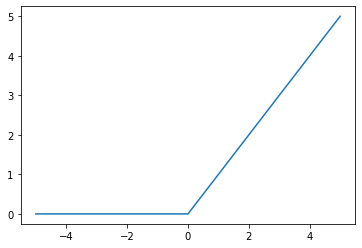

In [30]:
x = np.linspace(-5, 5, 3)  # We only need 3 points to draw ReLU
y = relu(x)

plt.plot(x, y)
plt.show()

For ReLU function, there is no derivative at $x=0$ defined by calculus.


However, we can just define a value for it. Usually the derivative of ReLU is defined as:

$$\text{ReLU}^ \prime (x) = \begin{cases}0 & x \le 0 \\1 & x \gt 0\end{cases}$$

So at $x=0$ the derivative is defined to be $0$.

## Training neural networks

Training complex networks can be difficult. There are massive improvements to be made to our implementation.

The update rule we implement is the original gradient descent, which can be massively improved. No learning rate schedule was used either.

The implementation of our function does not consider numerical stability. For example, our softmax function is not  numerical stable.

There can be better choice of activation functions. Since sigmoid activation have vanishing gradient problem in large networks.

We did not perform model selection using validation data.

In the next lesson, we will about about common problems and best practice for training neural networks.

## Extra:

Here is a website that lets you play around with the training of a neural network. To see how different setting affects the training and result.

http://playground.tensorflow.org

## Solutions:

In [31]:
# Solution to exercise 1

def network_bias(inputs, weights, biases, activation_fn):
    x = inputs
    for w, b in zip(weights, biases):
        x = activation_fn.forward((x @ w) + b)
    return x

In [32]:
# Solution to exercise 2

def backpropagation_bias(inputs, targets, weights, biases, activation_fn, loss_fn, learning_rate):
    """
    Backpropagation for a fully connected feed forward network with bias.
    
    :param inputs: A vector of network input
    :param targets: A vector of the target for network output
    :param weights: A list of layer weight matrix
    :param biases: A list of layer bias vector
    :param activation_fn: The activation function to use
    :param loss_fn: The loss function to use
    :param learning_rate: The learning rate for update rule
    :returns: A list of updated layer weight matrix and bias vector
    """
    
    # Rename variable to better match the formula
    x = inputs
    t = targets
    h = activation_fn
    loss = loss_fn
    
    n = len(weights)  # Number of hidden and ouput layer(s)
    params = {'w': weights, 'b': biases}
    grads = {'w': [None] * n, 'b': biases}
    cache = {'input': [None] * n, 'delta': [None] * n}
    
    # Forward pass
    for i in range(n):
        w = params['w'][i]
        b = params['b'][i]
        cache['input'][i] = x  # Save layer inputs
        s = x @ w + b
        x = h.forward(s)

    output = x  # Network output
    
    # Backward pass
    for i in range(n):
        # Start from last layer
        layer = (n - 1) - i  # Index of current layer
        o_i = cache['input'][layer]  # Input of current layer / Output of previous layer
        w_j = params['w'][layer]  # Weight of current layer
        s_j_der = h.backward(o_i @ w_j)
        
        if layer == (n - 1):  # If last layer
            delta_j = loss.backward(output, t) * s_j_der
        else:
            delta_l = cache['delta'][layer + 1]  # Delta of next layer
            w_l = params['w'][layer + 1]  # Weight of next layer
            delta_j = w_l @ delta_l * s_j_der
            
        grads['w'][layer] = np.outer(o_i, delta_j)
        grads['b'][layer] = delta_j
        cache['delta'][layer] = delta_j
    
    # Update parameters
    for i in range(n):
        params['w'][i] -= learning_rate * grads['w'][i]
        params['b'][i] -= learning_rate * grads['b'][i]
    
    return output

In [77]:
# Solution to exercise 3

# Weights for the input layer, hidden layers, and output layers.
weights_b = [np.random.rand(2, 10), np.random.rand(10, 2)]
biases_b = [np.zeros(10), np.zeros(2)]

learning_rate = 0.1

epoch = 200  # How many time to train the network with the whole training data.
num_e = 10  # Print info every num_e epoch
training_loss = 0
losses = []

for e in range(epoch):
    loss = 0
    for inputs, targets in zip(training['input'], training['target']):        
        outputs = backpropagation_bias(inputs, targets, weights_b, biases_b, ReLU, CrossEntropyLoss, learning_rate)

        training_loss += CrossEntropyLoss.forward(outputs, targets) / num_e
        loss += CrossEntropyLoss.forward(outputs, targets)
    losses.append(loss)

    # Print training info every set amount of epoch
    if not (e + 1) % num_e:
        print(f"At {e + 1: 5} epoch, mean loss of {num_e} epoch: {training_loss}")
        training_loss = 0

At    10 epoch, mean loss of 10 epoch: 69.9127474776679
At    20 epoch, mean loss of 10 epoch: 58.11183851043386
At    30 epoch, mean loss of 10 epoch: 54.60694051082548
At    40 epoch, mean loss of 10 epoch: 53.516423076351465
At    50 epoch, mean loss of 10 epoch: 52.569727966237814
At    60 epoch, mean loss of 10 epoch: 52.03470276247441
At    70 epoch, mean loss of 10 epoch: 51.74193517988944
At    80 epoch, mean loss of 10 epoch: 51.47856187251277
At    90 epoch, mean loss of 10 epoch: 50.14140025878953
At   100 epoch, mean loss of 10 epoch: 49.29044547863606
At   110 epoch, mean loss of 10 epoch: 49.1259387078269
At   120 epoch, mean loss of 10 epoch: 49.22909755635836
At   130 epoch, mean loss of 10 epoch: 49.3607949340306
At   140 epoch, mean loss of 10 epoch: 49.49863885067637
At   150 epoch, mean loss of 10 epoch: 49.46716564586022
At   160 epoch, mean loss of 10 epoch: 49.25086335696626
At   170 epoch, mean loss of 10 epoch: 49.07025250473208
At   180 epoch, mean loss of 10 

In [78]:
# Solution to exercise 4

# Test the network:
correct_count = 0
total_count = 0
for inputs, targets in zip(training['input'], training['target']):
    outputs = network_bias(inputs, weights_b, biases_b, ReLU)

    total_count += 1
    if np.argmax(outputs) == np.argmax(targets):
        correct_count += 1

accu = correct_count / total_count

print(f"Network accuracy: {accu * 100}%")

Network accuracy: 90.0%
